# PROBLEM STATEMENT

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [78]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [79]:
# loading the training dataset
df_train = pd.read_csv('black_friday_train.csv')
print(df_train)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1            

In [80]:
# display the first five rows of the dataset
print(df_train.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [81]:
# display the last five rows of the dataset
print(df_train.tail())

        User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
550063                 NaN                 NaN       368  
550064                

In [82]:
# shape of the dataset
print(df_train.shape)

(550068, 12)


In [83]:
# load the testing dataset
df_test = pd.read_csv('black_friday_test.csv')

In [84]:
# shape of the dataset
print(df_test.shape)

(233599, 11)


In [85]:
# Merge both train and test data
df = df_train.append(df_test)

In [86]:
print(df.shape)

(783667, 12)


In [87]:
# print the dataset
print(df.head(5))

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN   

In [88]:
# basic information about the columns in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB
None


In [89]:
# statistical information about the dataset
print(df.describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  7.836670e+05  783667.000000   783667.000000       783667.000000   
mean   1.003029e+06       8.079300        0.409777            5.366196   
std    1.727267e+03       6.522206        0.491793            3.878160   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001519e+06       2.000000        0.000000            1.000000   
50%    1.003075e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       537685.000000       237858.000000  550068.000000  
mean             9.844506           12.668605    9263.968713  
std              5.089093            4.125510    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

In [90]:
# drop the column 'USER_ID' from the dataset
df.drop(['User_ID'], axis = 1, inplace = True)

In [91]:
print(df.head())

  Product_ID Gender   Age  Occupation City_Category  \
0  P00069042      F  0-17          10             A   
1  P00248942      F  0-17          10             A   
2  P00087842      F  0-17          10             A   
3  P00085442      F  0-17          10             A   
4  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN   

In [92]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 71.7+ MB


In [93]:
print(df)

       Product_ID  Gender    Age  Occupation City_Category  \
0       P00069042       0   0-17          10             A   
1       P00248942       0   0-17          10             A   
2       P00087842       0   0-17          10             A   
3       P00085442       0   0-17          10             A   
4       P00285442       1    55+          16             C   
...           ...     ...    ...         ...           ...   
233594  P00118942       0  26-35          15             B   
233595  P00254642       0  26-35          15             B   
233596  P00031842       0  26-35          15             B   
233597  P00124742       0  46-50           1             C   
233598  P00316642       0  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2   

In [94]:
# Handling the categorical column 'Age'
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [95]:
df['Age'] = df['Age'].map({'0-17':1, '18-25':2,'26-35':3, '36-45':4,'46-50':5,'51-55':6,'55+':7})

In [96]:
print(df.head())

  Product_ID  Gender  Age  Occupation City_Category  \
0  P00069042       0    1          10             A   
1  P00248942       0    1          10             A   
2  P00087842       0    1          10             A   
3  P00085442       0    1          10             A   
4  P00285442       1    7          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN    8370.0  
1                 6.0                14.0   15200.0  
2                 NaN                 NaN    1422.0  
3                14.0                 NaN   

In [97]:
# second technique
from sklearn import preprocessing

# label encoder = to encode the values for the labels
lab = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Age'] = lab.fit_transform(df['Age'])

In [98]:
df['Age'].head()

0    0
1    0
2    0
3    0
4    6
Name: Age, dtype: int64

In [99]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [100]:
##fixing categorical City_category
df['City_Category'] = pd.get_dummies(df['City_Category'], drop_first = True)

In [101]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,0,4+,0,8,NaN,NaN,7969.0


In [102]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [103]:
df_city.head()

,1
0,0
1,0
2,0
3,0
4,0


In [104]:
df = pd.concat([df, df_city], axis = 1)

In [105]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,1
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,6,16,0,4+,0,8,NaN,NaN,7969.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,1,4+,1,8,NaN,NaN,NaN,1
233595,P00254642,0,2,15,1,4+,1,5,8.0,NaN,NaN,1
233596,P00031842,0,2,15,1,4+,1,1,5.0,12.0,NaN,1
233597,P00124742,0,4,1,0,4+,0,10,16.0,NaN,NaN,0


In [106]:
# Checking for the Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
1                                  0
dtype: int64

In [107]:
# drop the City Category features
df.drop('City_Category', axis = 1, inplace = True)

In [108]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,1
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0


In [109]:
#  rename the column '1' to 'City_Category'
df.rename(columns = {1 : 'City_Category'}, inplace = True)

In [110]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,4+,1,8,NaN,NaN,NaN,1
233595,P00254642,0,2,15,4+,1,5,8.0,NaN,NaN,1
233596,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1
233597,P00124742,0,4,1,4+,0,10,16.0,NaN,NaN,0


In [111]:
# Check for the Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
City_Category                      0
dtype: int64

In [112]:
# Missing Values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [113]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [114]:
df['Product_Category_2'].mode()[0]

8.0

In [115]:
# Fill the mode value in the place of null in Product_Category_2
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [116]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [117]:
# Checking the NULL Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
City_Category                      0
dtype: int64

In [118]:
# Checking for the NULL Value in 'Product_Category_3'
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [119]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [120]:
df['Product_Category_3'].mode()[0]

16.0

In [121]:
# filling the mode value in Product_Category_3
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [122]:
# Checking for the NULL Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
City_Category                      0
dtype: int64

In [123]:
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [124]:
df['Purchase'] = df['Purchase'].mean()

In [125]:
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [126]:
# Checking for the NULL Values
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
City_Category                 0
dtype: int64

# OBSERVATION:

Now we do not have any missing values in the dataset.

In [127]:
df.head(10)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category
0,P00069042,0,0,10,2,0,3,8.0,16.0,9263.968713,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,9263.968713,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,9263.968713,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,9263.968713,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,9263.968713,0
5,P00193542,1,2,15,3,0,1,2.0,16.0,9263.968713,0
6,P00184942,1,4,7,2,1,1,8.0,17.0,9263.968713,1
7,P00346142,1,4,7,2,1,1,15.0,16.0,9263.968713,1
8,P0097242,1,4,7,2,1,1,16.0,16.0,9263.968713,1
9,P00274942,1,2,20,1,1,8,8.0,16.0,9263.968713,0


In [128]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [129]:
# Replace '+' with ''
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [130]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category
0,P00069042,0,0,10,2,0,3,8.0,16.0,9263.968713,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,9263.968713,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,9263.968713,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,9263.968713,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,9263.968713,0


In [131]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [132]:
# Checking for the datatypes in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  City_Category               783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(1)
memory usage: 66.5+ MB


In [133]:
##convert object into integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  City_Category               783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(1)
memory usage: 63.5+ MB


In [135]:
df['City_Category'] = df['City_Category'].astype('int')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  City_Category               783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(1)
memory usage: 65.8+ MB


In [137]:
##Visualisation Age vs Purchased for gender
df['Gender'].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

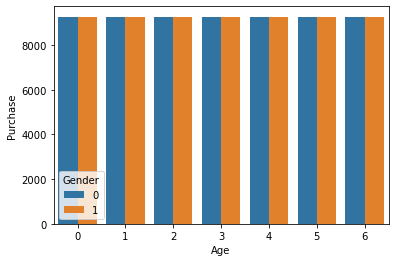

In [139]:
##Visualisation Age vs Purchased for gender
sns.barplot('Age','Purchase',hue='Gender',data=df)

# OBSERVATION:

Purchasing of women is equal to that of men.

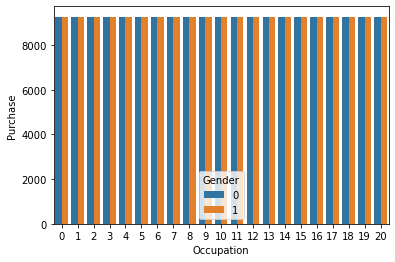

In [140]:
## Visualization of Purchase with occupation gender wise
sns.barplot('Occupation', 'Purchase', hue = 'Gender', data = df)

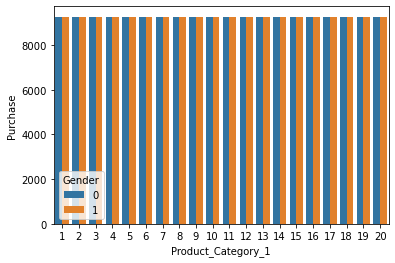

In [143]:
## Visualization of Product_Category_1 with Purchase gender wise
sns.barplot('Product_Category_1','Purchase', hue = 'Gender', data = df)

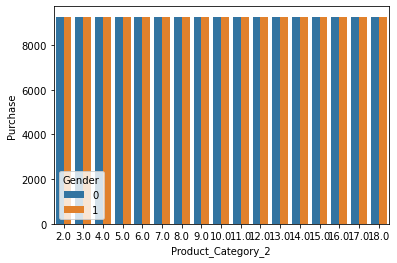

In [144]:
## Visualization of Product_Category_2 with Purchase gender wise
sns.barplot('Product_Category_2','Purchase', hue = 'Gender', data = df)

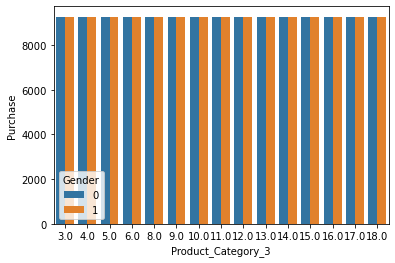

In [145]:
## Visualization of Product_Category_3 with Purchase gender wise
sns.barplot('Product_Category_3','Purchase', hue = 'Gender', data = df)

In [146]:
# Feature Scaling
df_test = df[df['Purchase'].isnull()]

In [147]:
df_test = df[~df['Purchase'].isnull()]

In [148]:
X=df_train.drop('Purchase',axis=1)

In [149]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [150]:
X.shape

(550068, 11)

In [151]:
y=df_train['Purchase']

In [152]:
y.shape

(550068,)

In [153]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64